# Exploring Business Analytics

## Problem statement:
You are the business owner of the retail firm and want to see
how your company is performing. You are interested in finding
out the weak areas where you can work to make more profit.
What all business problems you can derive by looking into the
data?

# Task-5
We are asked to Perform  ‘Exploratory Data Analysis’ on the provided dataset ‘SampleSuperstore’.

Steps:

- Import Libraries

- Read the Data

- Data Preprocessing

- Exploratory Data Analysis

- Derived insights from the given data

Let's get started!

## import dependecies

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## mount drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
## Its time to load the dataset

In [4]:
data = pd.read_csv("/content/drive/My Drive/SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


There are no null values in our dataset.

In [6]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


There is lot of difference between 75% and max means (right  tailed data)and also lot of difference between mean is nearly at 75% in sales and Profit(highly skewed)

In [7]:
data.Sales.skew()

12.97275234181623

In [8]:
data.Profit.skew()

7.561431562468343

In [9]:
pd.crosstab(data['Segment'],data['State'],margins=True)

State,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,All
Segment,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Consumer,25,110,37,1048,95,43,49,7,180,85,9,276,73,14,8,76,26,0,46,58,132,51,28,38,4,19,18,6,57,15,643,142,5,255,35,67,284,15,22,2,100,524,31,5,117,275,1,35,0,5191
Corporate,28,69,14,618,57,27,36,0,136,59,9,120,41,10,8,35,12,5,44,40,70,16,14,15,2,13,13,9,50,11,321,75,0,123,11,38,196,21,19,10,56,312,12,5,62,131,0,47,0,3020
Home Office,8,45,9,335,30,12,11,3,67,40,3,96,35,6,8,28,4,3,15,37,53,22,11,13,9,6,8,12,23,11,164,32,2,91,20,19,107,20,1,0,27,149,10,1,45,100,3,28,1,1783
All,61,224,60,2001,182,82,96,10,383,184,21,492,149,30,24,139,42,8,105,135,255,89,53,66,15,38,39,27,130,37,1128,249,7,469,66,124,587,56,42,12,183,985,53,11,224,506,4,110,1,9994


In [10]:
pd.crosstab(data['Ship Mode'],data['State'],margins=True)

State,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,All
Ship Mode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
First Class,9,42,10,322,44,19,18,0,54,22,4,67,16,1,6,13,10,0,18,20,21,10,3,8,1,7,5,2,14,1,179,38,0,93,5,24,109,18,3,2,22,144,4,0,50,68,0,12,0,1538
Same Day,1,16,2,119,6,10,2,0,28,15,0,26,3,1,1,5,2,0,7,4,18,4,4,2,1,3,1,0,1,1,62,14,0,52,7,0,16,0,5,0,2,48,2,0,5,39,1,7,0,543
Second Class,18,27,10,395,33,11,16,3,67,31,4,104,35,10,2,53,15,0,14,35,48,13,7,28,0,6,12,11,24,9,209,42,5,94,7,17,91,21,18,1,25,191,19,1,43,105,0,15,0,1945
Standard Class,33,139,38,1165,99,42,60,7,234,116,13,295,95,18,15,68,15,8,66,76,168,62,39,28,13,22,21,14,91,26,678,155,2,230,47,83,371,17,16,9,134,602,28,10,126,294,3,76,1,5968
All,61,224,60,2001,182,82,96,10,383,184,21,492,149,30,24,139,42,8,105,135,255,89,53,66,15,38,39,27,130,37,1128,249,7,469,66,124,587,56,42,12,183,985,53,11,224,506,4,110,1,9994


# EDA

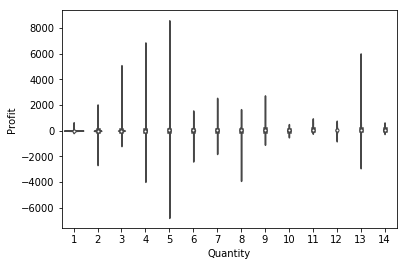

In [11]:
x = data.iloc[:,10]
y = data.iloc[:,12]
ax = sns.violinplot(x,y)

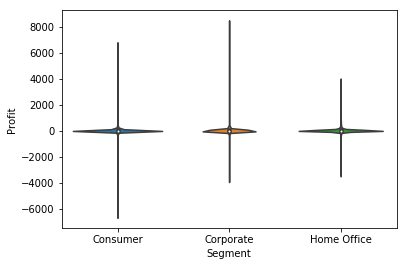

In [12]:
x = data.iloc[:,1]
y = data.iloc[:,12]
ax = sns.violinplot(x,y)

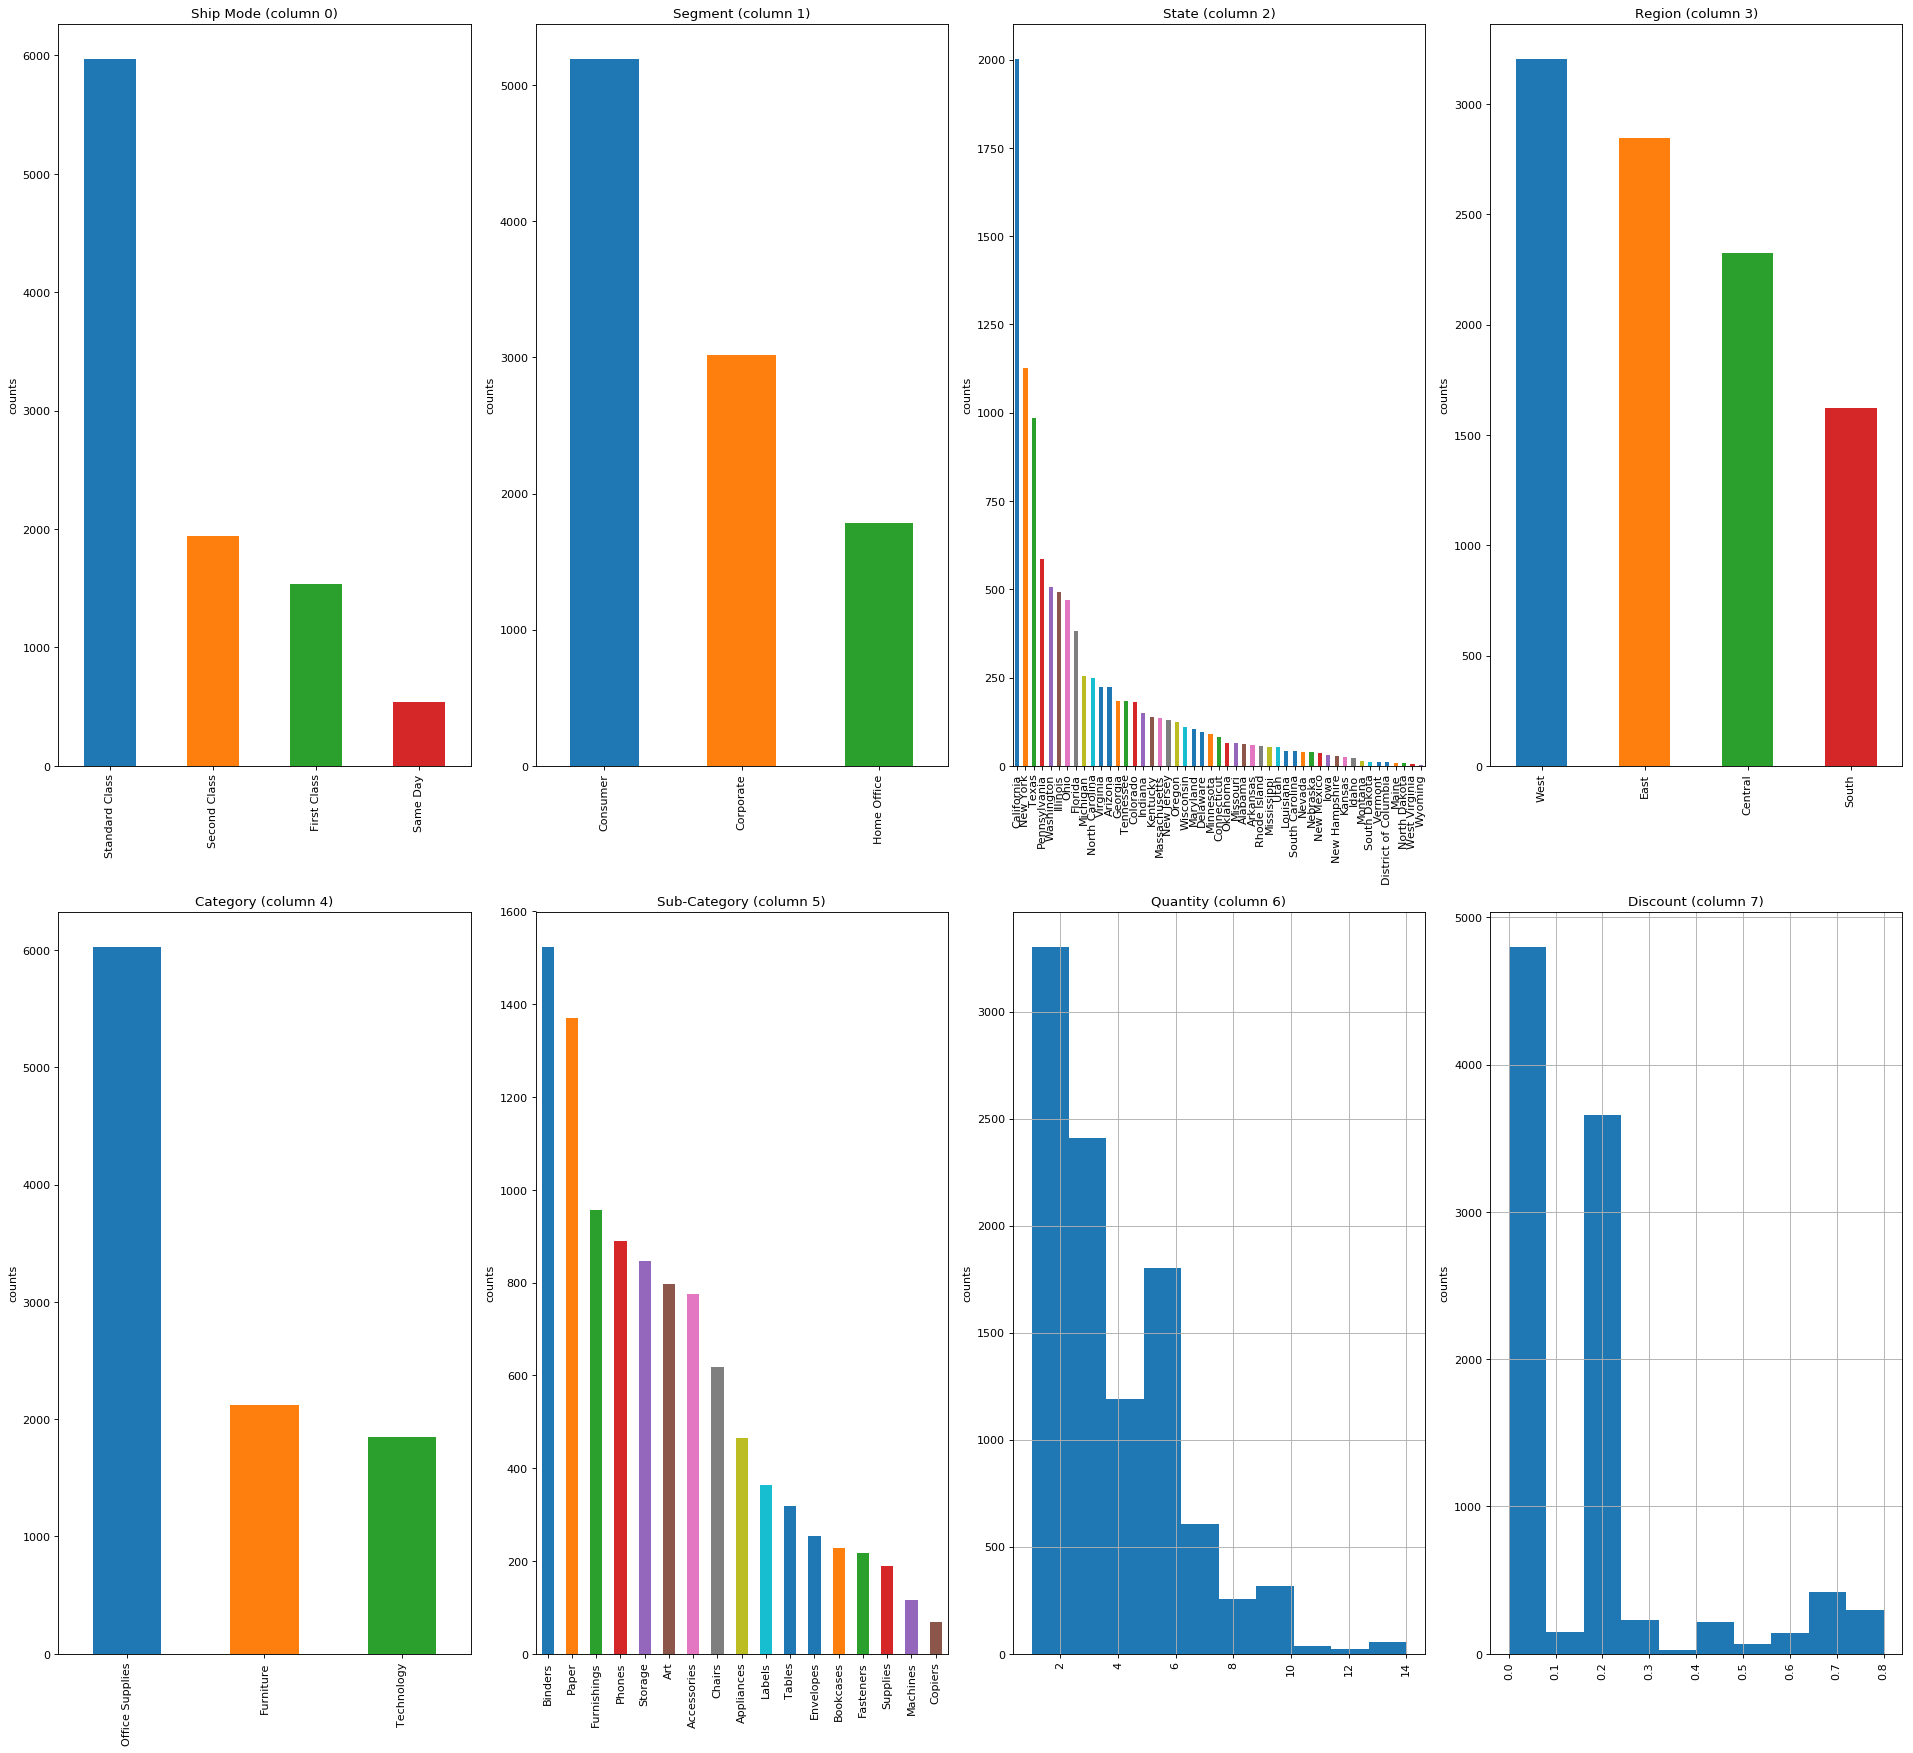

In [13]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
    
plotPerColumnDistribution(data,30,4)

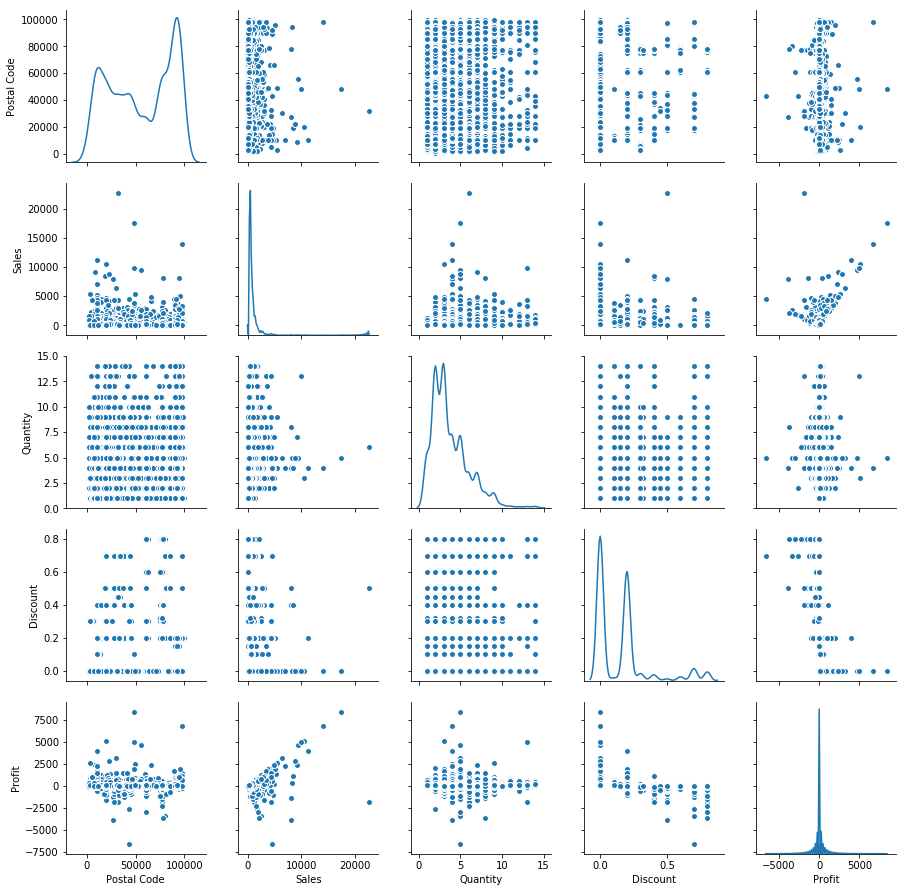

In [14]:
# Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables...
sns.pairplot(data,diag_kind="kde")

Let us go through feature importances

In [16]:
from feature_selector import FeatureSelector
fs = FeatureSelector(data = data.iloc[:,:12], labels = data.iloc[:,12])
fs.identify_collinear(correlation_threshold=0.5)

0 features with a correlation magnitude greater than 0.50.



In [24]:
fs.identify_zero_importance(task="regression",eval_metric="rmse",n_iterations=10,early_stopping= True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[993]	valid_0's rmse: 120.499
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[229]	valid_0's rmse: 125.245
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[993]	valid_0's rmse: 100.686
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[525]	valid_0's rmse: 53.2402
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[996]	valid_0's rmse: 143.319
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[979]	valid_0's rmse: 171.925
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[39]	valid_0's rmse: 192.229
Training until vali

#Data Preprocessing
##one hot encoding

In [25]:
one_hot_features = fs.one_hot_features
base_features = fs.base_features
print('There are {} original and {} one-hot features' .format(len(base_features),len(one_hot_features)))

There are 12 original and 612 one-hot features


In [26]:
fs.data_all.head()

,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Country_United States,City_Aberdeen,City_Abilene,City_Akron,City_Albuquerque,City_Alexandria,City_Allen,City_Allentown,City_Altoona,City_Amarillo,City_Anaheim,City_Andover,City_Ann Arbor,City_Antioch,City_Apopka,City_Apple Valley,City_Appleton,City_Arlington,City_Arlington Heights,City_Arvada,City_Asheville,City_Athens,City_Atlanta,City_Atlantic City,City_Auburn,City_Aurora,City_Austin,City_Avondale,City_Bakersfield,City_Baltimore,City_Bangor,City_Bartlett,City_Bayonne,...,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming,Region_Central,Region_East,Region_South,Region_West,Category_Furniture,Category_Office Supplies,Category_Technology,Sub-Category_Accessories,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount
0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00
1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00
2,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00
3,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45
4,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20


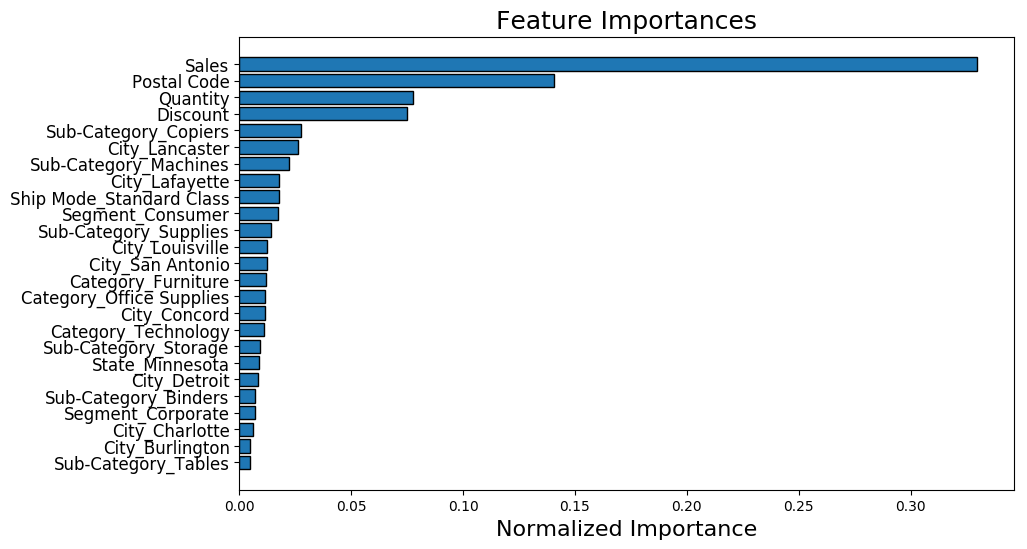

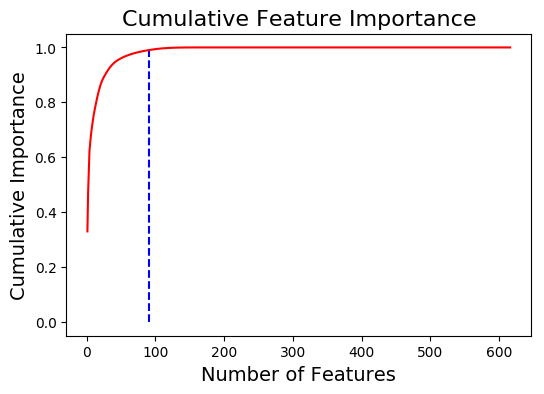

90 features required for 0.99 of cumulative importance


In [27]:
fs.plot_feature_importances(threshold=0.99,plot_n= 25)

In [28]:
fs.feature_importances.head()

,feature,importance,normalized_importance,cumulative_importance
0,Sales,7059.0,0.329921,0.329921
1,Postal Code,3010.9,0.140723,0.470644
2,Quantity,1662.5,0.077701,0.548345
3,Discount,1601.9,0.074869,0.623215
4,Sub-Category_Copiers,590.6,0.027603,0.650818


In [29]:
fifty_features = list(fs.feature_importances.loc[:49,'feature'])
fifty_features

['Sales',
 'Postal Code',
 'Quantity',
 'Discount',
 'Sub-Category_Copiers',
 'City_Lancaster',
 'Sub-Category_Machines',
 'City_Lafayette',
 'Ship Mode_Standard Class',
 'Segment_Consumer',
 'Sub-Category_Supplies',
 'City_Louisville',
 'City_San Antonio',
 'Category_Furniture',
 'Category_Office Supplies',
 'City_Concord',
 'Category_Technology',
 'Sub-Category_Storage',
 'State_Minnesota',
 'City_Detroit',
 'Sub-Category_Binders',
 'Segment_Corporate',
 'City_Charlotte',
 'City_Burlington',
 'Sub-Category_Tables',
 'City_Minneapolis',
 'Sub-Category_Chairs',
 'Ship Mode_First Class',
 'City_Providence',
 'Ship Mode_Second Class',
 'Region_Central',
 'Sub-Category_Phones',
 'Segment_Home Office',
 'Sub-Category_Paper',
 'Region_East',
 'State_California',
 'Sub-Category_Appliances',
 'Sub-Category_Accessories',
 'City_Houston',
 'Sub-Category_Bookcases',
 'State_Texas',
 'Sub-Category_Envelopes',
 'City_Tucson',
 'State_Utah',
 'Region_South',
 'State_North Carolina',
 'State_New Yor

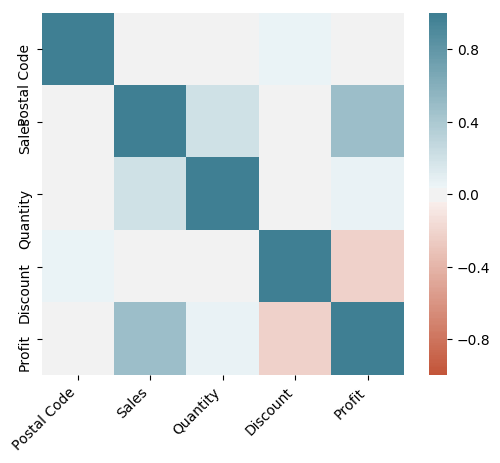

In [34]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

We can see sales and profit have correlation factor of 0.4.
Also discount have strong negative correlation with profit.
Quantity and sales are also correlated as expected.

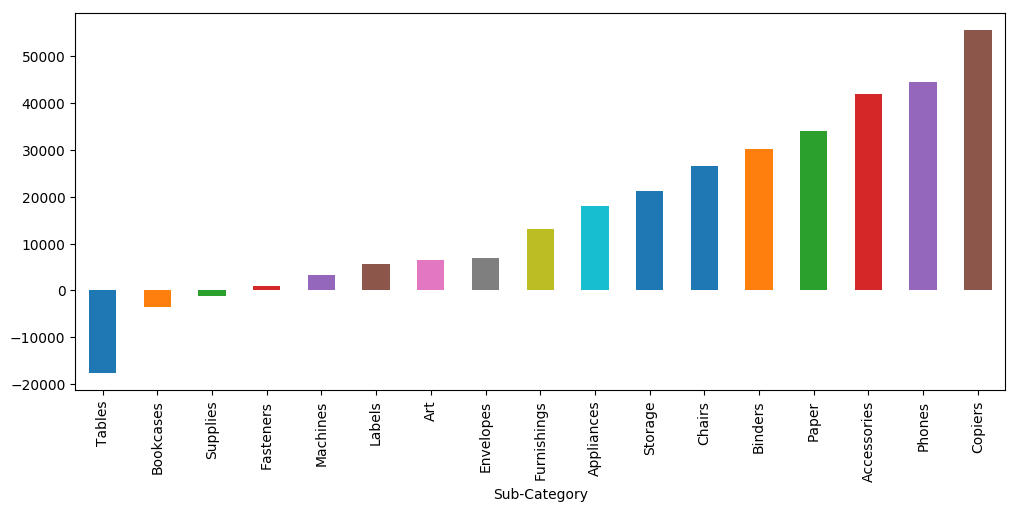

In [30]:
data.groupby("Sub-Category")['Profit'].sum().sort_values().plot.bar(figsize = (12,5))

we can state that there are category such as tables and bookcases where the company is facing loss, and also the above dataset gives us a basic insight upon which category does the companies make properties

In [31]:
pd.DataFrame(data.groupby('City').sum()['Profit'].sort_values(ascending=True).head(20))

,Profit
City,
Philadelphia,-13837.7674
Houston,-10153.5485
San Antonio,-7299.0502
Lancaster,-7239.0684
Chicago,-6654.5688
Burlington,-3622.8772
Dallas,-2846.5257
Phoenix,-2790.8832
Aurora,-2691.7386


In [36]:
city_data=data.groupby("City")["Profit","Sales","Discount"].sum()

In [37]:
city_data.head()

,Profit,Sales,Discount
City,,,
Aberdeen,6.6300,25.500,0.0
Abilene,-3.7584,1.392,0.8
Akron,-186.6356,2729.986,7.5
Albuquerque,634.0881,2220.160,0.8
Alexandria,318.6183,5519.570,0.0


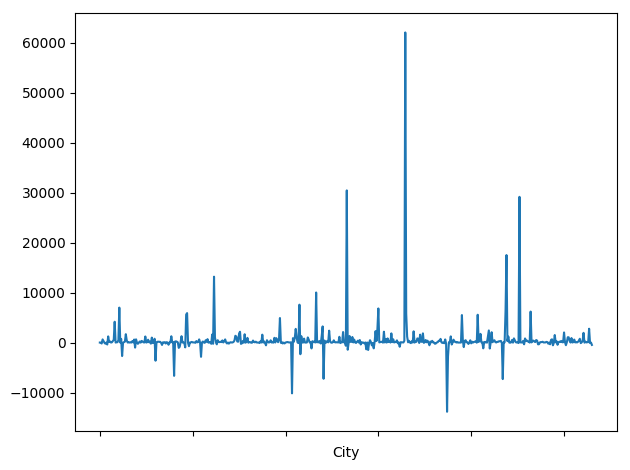

In [38]:
city_data["Profit"].plot()
plt.tight_layout()

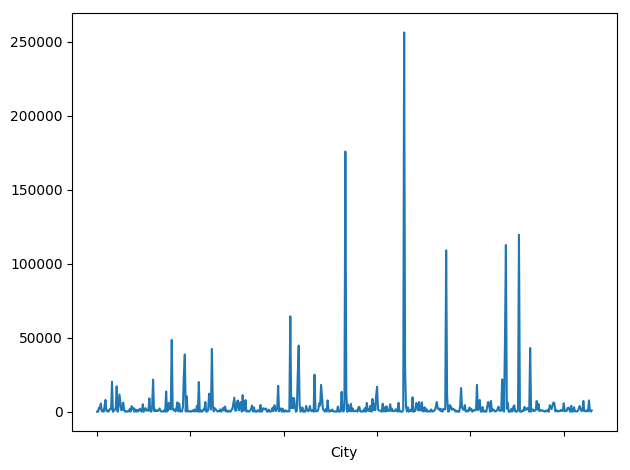

In [39]:
city_data["Sales"].plot()
plt.tight_layout()

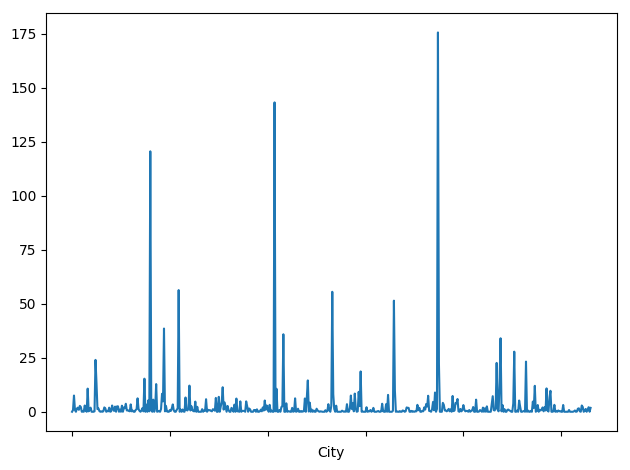

In [40]:
city_data["Discount"].plot()
plt.tight_layout()

In [32]:
pd.DataFrame(data.groupby('State').sum())['Profit'].sort_values(ascending=True)

State
Texas                  -25729.3563
Ohio                   -16971.3766
Pennsylvania           -15559.9603
Illinois               -12607.8870
North Carolina          -7490.9122
Colorado                -6527.8579
Tennessee               -5341.6936
Arizona                 -3427.9246
Florida                 -3399.3017
Oregon                  -1190.4705
Wyoming                   100.1960
West Virginia             185.9216
North Dakota              230.1497
South Dakota              394.8283
Maine                     454.4862
Idaho                     826.7231
Kansas                    836.4435
District of Columbia     1059.5893
New Mexico               1157.1161
Iowa                     1183.8119
New Hampshire            1706.5028
South Carolina           1769.0566
Montana                  1833.3285
Nebraska                 2037.0942
Louisiana                2196.1023
Vermont                  2244.9783
Utah                     2546.5335
Mississippi              3172.9762
Nevada        

# Further analysis is done in microsoft power BI